#                           Mercedes-Benz Greener Manufacturing

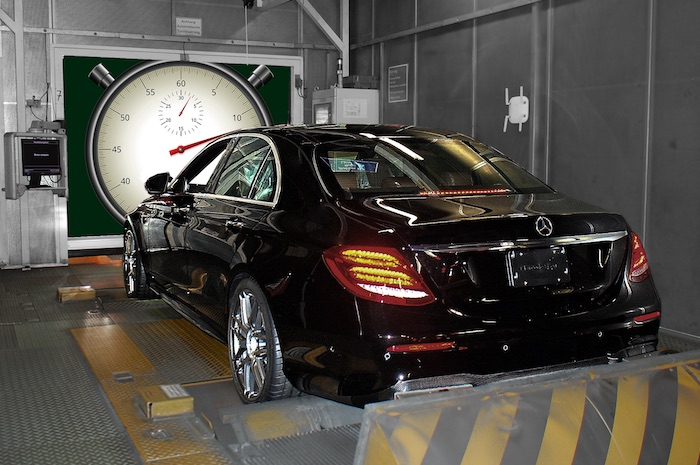

# Business Problem

# 1.1 Description

## Description

Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include, for example, the passenger safety cell with crumple zone, the airbag and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium car makers. Daimler’s Mercedes-Benz cars are leaders in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams. .

To ensure the safety and reliability of each and every unique car configuration before they hit the road, Daimler’s engineers have developed a robust testing system. But, optimizing the speed of their testing system for so many possible feature combinations is complex and time-consuming without a powerful algorithmic approach. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Daimler’s production lines.

In this competition, Daimler is challenging Kagglers to tackle the curse of dimensionality and reduce the time that cars spend on the test bench. Competitors will work with a dataset representing different permutations of Mercedes-Benz car features to predict the time it takes to pass testing. Winning algorithms will contribute to speedier testing, resulting in lower carbon dioxide emissions without reducing Daimler’s standards.

## Problem Statemtent:

#### To predict the  target variable y Iie time in seconds that the car needs to pass the testing.

### Source:  https://www.kaggle.com/c/mercedes-benz-greener-manufacturing

#  Real World / Business Objectives and Constraints:

##### 1---->> Predict time in seconds  with high value of R^2 (Coefficient of determination).

#####  2---->> No strict latency constraints.

This dataset contains an anonymized set of variables, each representing a custom feature in a Mercedes car. For example, a variable could be 4WD, added air suspension, or a head-up display. The target variable y is the time in seconds that the car needs to pass the test. Our job is to predict the time it takes to pass testing.

#  Machine Learning Problem Formulation

### Data Description:

This dataset contains an anonymized set of variables, each representing a custom feature in a Mercedes car. For example, a variable could be 4WD, added air suspension, or a head-up display.

The ground truth is labeled ‘y’ and represents the time (in seconds) that the car took to pass testing for each variable.

### File descriptions:

Variables with letters are categorical. Variables with 0/1 are binary values.

train.csv - the training set
test.csv - the test set, you must predict the 'y' variable for the 'ID's in this file
sample_submission.csv - a sample submission file in the correct format

#### https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/data

### Type of Machine Learning Problem:

It is a Regression problem where y belongs to real value.
A regression problem requires the prediction of a quantity. A regression can have real valued or discrete input variables. A problem with multiple input variables is often called a multivariate regression problem.

###  Performance Metric

Source: https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/overview/evaluation

Metric(s):

R^2 (Coefficient of determination).

https://en.wikipedia.org/wiki/Coefficient_of_determination

### Importing libraries:

In [2]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import xgboost as xgb
color = sns.color_palette()
from statsmodels.formula.api import ols
from scipy import stats

from sklearn.linear_model import BayesianRidge,ElasticNet,Lasso,SGDRegressor,Ridge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split
from sklearn.svm import LinearSVR,SVR
import xgboost as xgb
from sklearn.metrics import r2_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split 

from sklearn import linear_model

from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import cross_val_score

import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor


from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.decomposition import TruncatedSVD

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Data loading

In [52]:
df=pd.read_csv('train.csv')

## Exploratory Data Analysis

https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-mercedes

In [53]:
df.shape

(4209, 378)

In [54]:
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

##### The target variable is continuous. From X0 to X8 is categorical. The others is looks like a binary nominal data type. 

In [55]:
numerical_features = df.select_dtypes(include=[np.number]).columns
categorical_features = df.select_dtypes(include=[np.object]).columns

print('Numerical feature size: {}'.format(len(numerical_features)))
print('Categorical feature size: {} '.format(len(categorical_features)))

Numerical feature size: 370
Categorical feature size: 8 


#### Explore the number of unique values in each categorical variable.

In [56]:
df[['X0', 'X1' ,  'X2', 'X3', 'X4', 'X5', 'X6', 'X8']].apply(lambda x : len(x.unique()))

X0    47
X1    27
X2    44
X3     7
X4     4
X5    29
X6    12
X8    25
dtype: int64

In [57]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.ix[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count


#### Good to see that there are no missing values in the dataset :)

### Integer Columns Analysis:

In [58]:
unique_values_dict = {}
for col in df.columns:
    if col not in ["ID", "y", "X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        unique_value = str(np.sort(df[col].unique()).tolist())
        tlist = unique_values_dict.get(unique_value, [])
        tlist.append(col)
        unique_values_dict[unique_value] = tlist[:]
for unique_val, columns in unique_values_dict.items():
    print("Columns containing the unique values : ",unique_val)
    print(columns)
    print("--------------------------------------------------")
        

Columns containing the unique values :  [0, 1]
['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X144', 'X145'

### So all the integer columns are binary with some columns have only one unique value 0. Possibly we could exclude those columns in our modeling activity.

## Now let us explore the categorical columns present in the dataset.

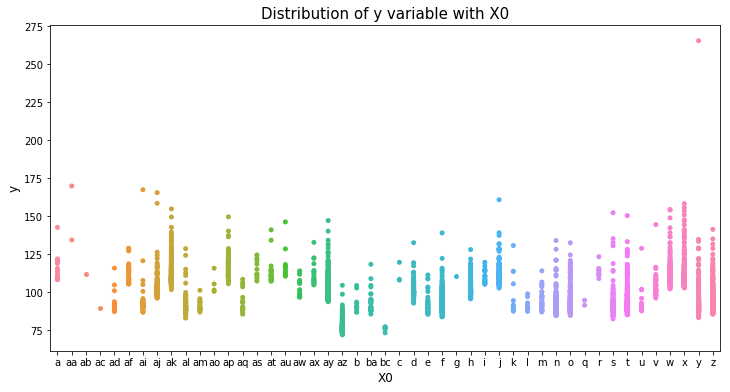

In [9]:
var_name = "X0"
col_order = np.sort(df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.stripplot(x=var_name, y='y', data=df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

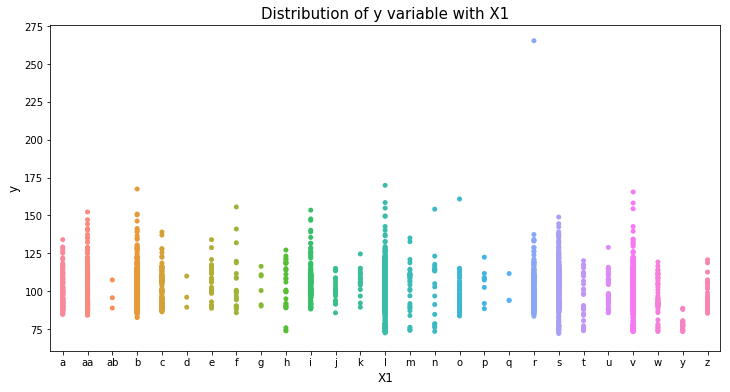

In [10]:
var_name = "X1"
col_order = np.sort(df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.stripplot(x=var_name, y='y', data=df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

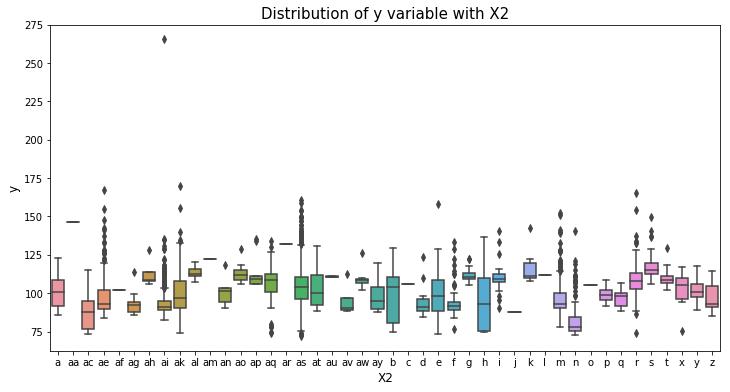

In [11]:
var_name = "X2"
col_order = np.sort(df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var_name, y='y', data=df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

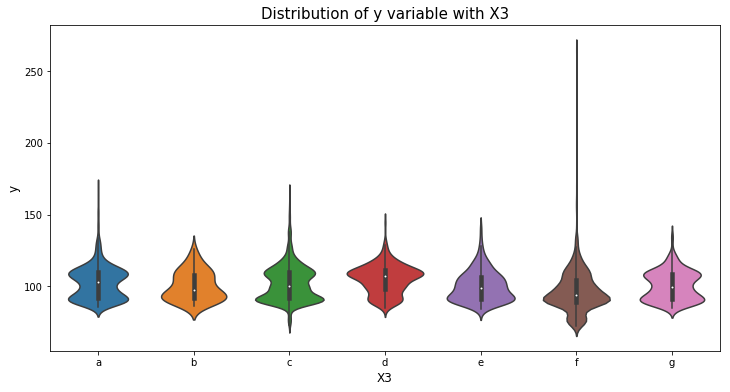

In [12]:
var_name = "X3"
col_order = np.sort(df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.violinplot(x=var_name, y='y', data=df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

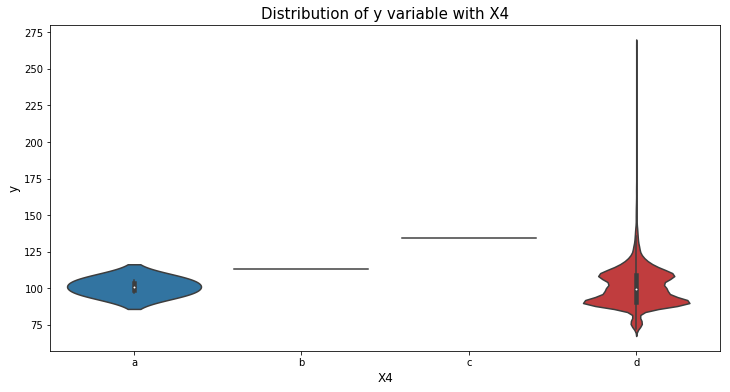

In [13]:
var_name = "X4"
col_order = np.sort(df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.violinplot(x=var_name, y='y', data=df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

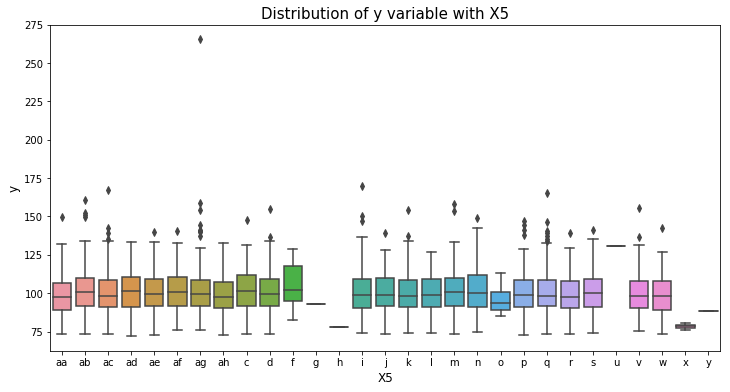

In [14]:
var_name = "X5"
col_order = np.sort(df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var_name, y='y', data=df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

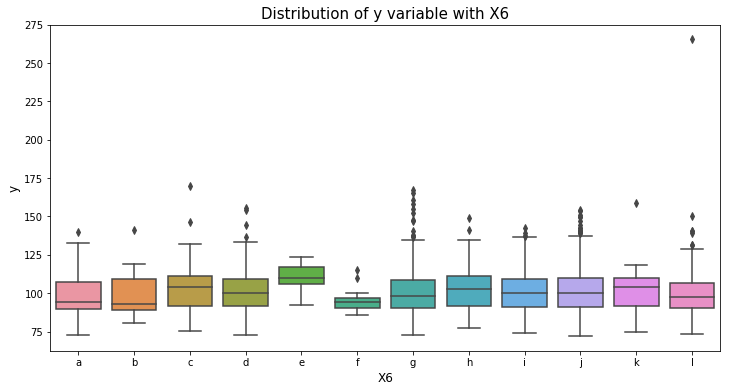

In [15]:
var_name = "X6"
col_order = np.sort(df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var_name, y='y', data=df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

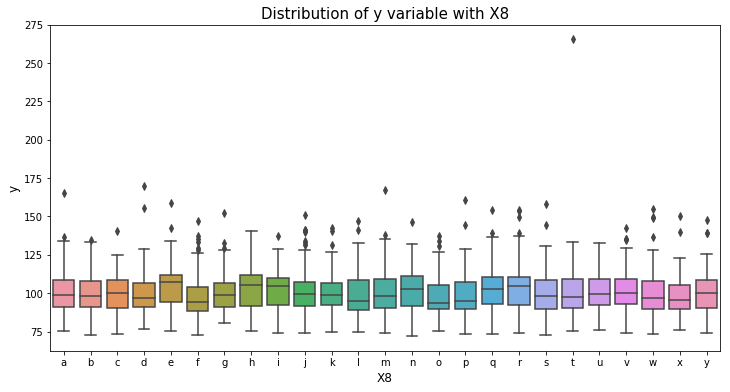

In [16]:
var_name = "X8"
col_order = np.sort(df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var_name, y='y', data=df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

#### Binary Variables:

Now we can look into the binary variables. There are quite a few of them as we have seen before. Let us start with getting the number of 0's and 1's in each of these variables. 

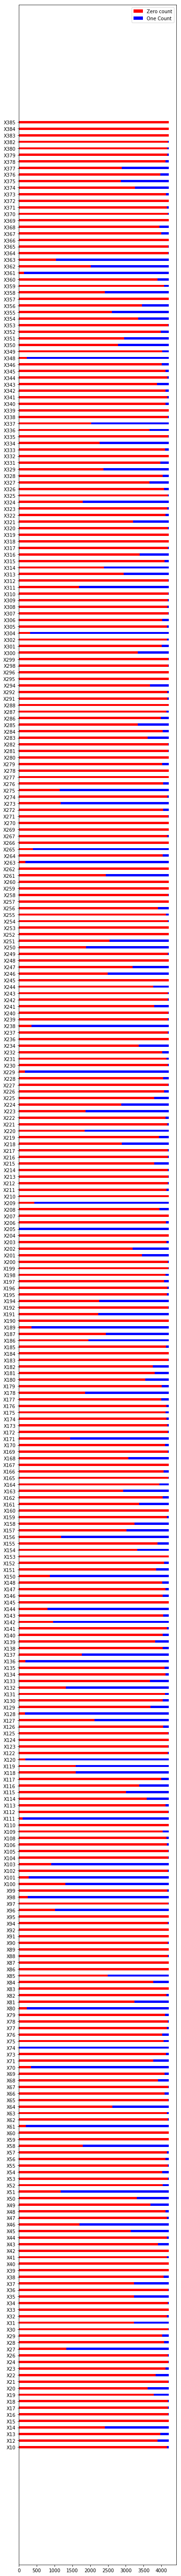

In [17]:
zero_count_list = []
one_count_list = []
cols_list = unique_values_dict['[0, 1]']
for col in cols_list:
    zero_count_list.append((df[col]==0).sum())
    one_count_list.append((df[col]==1).sum())

N = len(cols_list)
ind = np.arange(N)
width = 0.35

plt.figure(figsize=(6,100))
p1 = plt.barh(ind, zero_count_list, width, color='red')
p2 = plt.barh(ind, one_count_list, width, left=zero_count_list, color="blue")
plt.yticks(ind, cols_list)
plt.legend((p1[0], p2[0]), ('Zero count', 'One Count'))
plt.show()

# Target variable:

In [18]:

df.y.describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

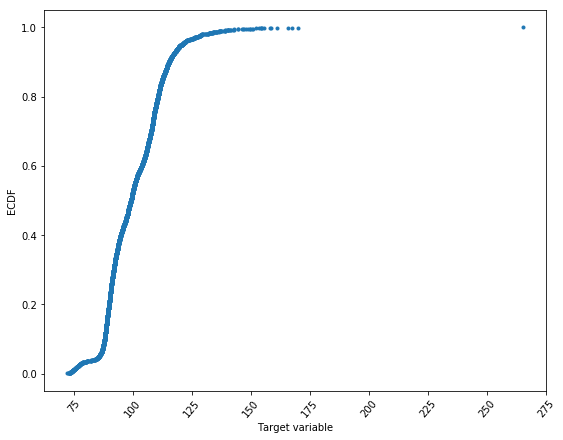

In [19]:
def ecdf(data):
    return np.sort(data), np.arange(1, len(data)+1) / len(data)

x1, y1 = ecdf(df.y)
plt.figure(figsize=(9, 7))
plt.xlabel('Target variable')
plt.ylabel('ECDF')
plt.plot(x1, y1, marker='.', linestyle='none')
plt.xticks(rotation=50)
plt.show()

Text(0.5,1,'Target distribution')

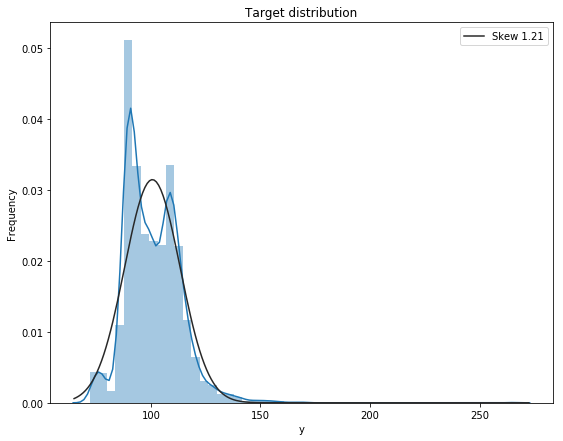

In [20]:
plt.figure(figsize=(9, 7))
sns.distplot(df['y'] , fit=stats.norm);
plt.legend(['Skew {:.2f}'.format(df['y'].skew())], loc='best')
plt.ylabel('Frequency')
plt.title('Target distribution')

Text(0.5,1,'Target distribution')

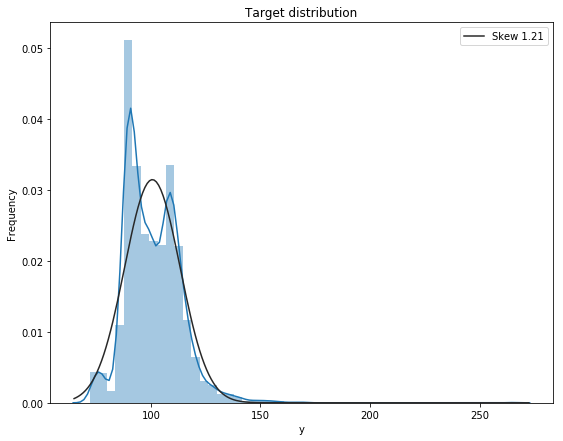

In [21]:

plt.figure(figsize=(9, 7))
sns.distplot(df['y'] , fit=stats.norm);
plt.legend(['Skew {:.2f}'.format(df['y'].skew())], loc='best')
plt.ylabel('Frequency')
plt.title('Target distribution')

##### Little bit right skewed.

##### Let us find the outlier values

In [60]:
print((df.loc[df.y>150,'y'].values))
df=df[df.y<150]
print("Removing outliers based on above information and setting 150 as a threshold value . . . . . . . . . . . . . . . . . . . . ")
print(df.shape)


[150.43 169.91 154.87 265.32 158.53 154.43 160.87 150.89 152.32 167.45
 154.16 158.23 153.51 165.52 155.62]
Removing outliers based on above information and setting 150 as a threshold value . . . . . . . . . . . . . . . . . . . . 
(4194, 378)


Text(0.5,1,'Target distribution')

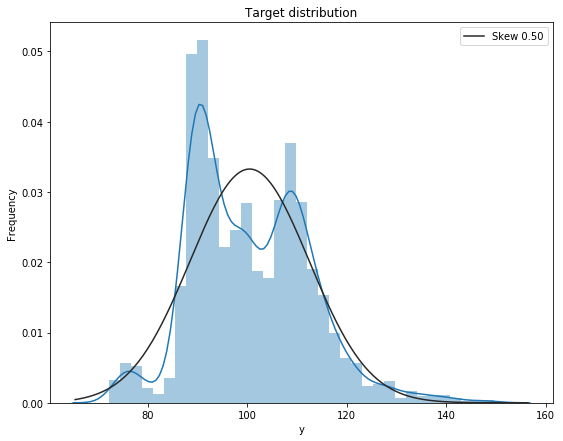

In [61]:

plt.figure(figsize=(9, 7))
sns.distplot(df['y'] , fit=stats.norm);
plt.legend(['Skew {:.2f}'.format(df['y'].skew())], loc='best')
plt.ylabel('Frequency')
plt.title('Target distribution')

#### It looks much better.

### Predictor features:
#### Explore the association between the target and the predictor variables:

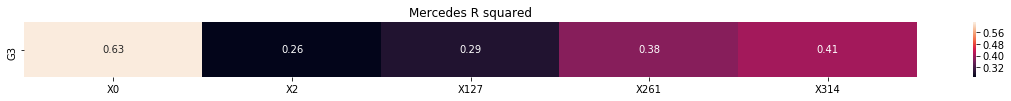

In [62]:
# r squared method
def get_r2(x, y, data):
    formula = '{} ~ C({})'.format(y, x)
    return ols(formula, data).fit().rsquared

r2 = pd.DataFrame(index=['G3'])

for i in df.columns:
    if i not in ['ID', 'y']:
        score = get_r2(i, 'y', df)
        if score >= 0.2:
            r2.loc[:, i] = get_r2(i, 'y', df)
            
r2.fillna(np.nan, inplace=True)

plt.figure(figsize=(20, 1))
plt.title('Mercedes R squared')
sns.heatmap(r2, annot=True,fmt='.2f')
plt.show()

#### The X0 have a best relationship with the target. (64%).

In [63]:
df.shape

(4194, 378)

# E.D.A CONCLUSION:

#### Columns containing the unique values :  [0] WE HAVE TO REMOVE THESE COLUMNS WHICH CONTAINING ONLY ZEROS
['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X339', 'X347']

#### We also try to remove the outliers.

# DATA PREPERATION:

In [64]:
df.drop(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X339', 'X347'], axis=1,inplace=True)

In [65]:
df.shape

(4194, 365)

In [89]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [20, 80])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))
drop=[]
drop = drop.append(outliers_iqr(df.y[df.y<150]))
drop

In [91]:
drop

In [80]:
df.drop(X_train.index[ 216,  678, 1031, 1135, 1340, 2346, 2365, 2874, 2892, 3077]), inplace=True)


SyntaxError: invalid syntax (<ipython-input-80-8fc758ab471a>, line 1)

In [29]:
for f in ["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(df[f].values)) 
        df[f] = lbl.transform(list(df[f].values))

In [30]:
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X234,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X291,X292,X294,X295,X296,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X331,X332,X333,X334,X335,X336,X337,X338,X340,X341,X342,X343,X344,X345,X346,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,32,23,16,0,3,24,9,14,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,32,21,18,4,3,28,11,14,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,20,24,33,2,3,27,9,23,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,9,80.62,20,21,33,5,3,27,11,4,0,0,0,0,0,0,0,0,0,0,0,0,0

In [31]:
y=df['y']

In [32]:
df.drop(['y'], axis=1,inplace=True)

In [33]:
df.shape

(4182, 364)

# Random Train and Test split(80:20)

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(df, y, test_size=0.2, random_state=42) 

In [35]:
print("No. of datapoints in X_train :",len(X_train))
print("No. of datapoints in X_test :",len(X_test))
print("Shape of Y_train :",Y_train.shape)
print("Shape of Y_test :",Y_test.shape)

No. of datapoints in X_train : 3345
No. of datapoints in X_test : 837
Shape of Y_train : (3345,)
Shape of Y_test : (837,)


### Let us explore the X0, X2 and the X5 unique values. We append the differences to lists.

In [36]:
x0_new_to_train = [i for i in X_test.X0.unique() if i not in X_train.X0.unique()]
x2_new_to_train = [i for i in X_test.X2.unique() if i not in X_train.X2.unique()]
x5_new_to_train = [i for i in X_test.X5.unique() if i not in X_train.X5.unique()]

print(x0_new_to_train)
print(x2_new_to_train)    
print(x5_new_to_train)

[]
[]
[]


In [37]:
x0_new_to_test = [i for i in X_train.X0.unique() if i not in X_test.X0.unique()]
x2_new_to_test = [i for i in X_train.X2.unique() if i not in X_test.X2.unique()]
x5_new_to_test = [i for i in X_train.X5.unique() if i not in X_test.X5.unique()]

print(x0_new_to_test)
print(x2_new_to_test)  
print(x5_new_to_test)

[23, 37, 1, 11, 24, 3, 2, 28]
[40, 3, 18, 19, 5, 29, 36, 31, 14, 34, 22, 9]
[24, 27, 11, 12, 28]


#### We change that values.

In [38]:
X_train.X0 = X_train.X0.apply(lambda x : X_train.X0.mode()[0] if x in x0_new_to_test else x)
X_train.X2 = X_train.X2.apply(lambda x : X_train.X2.mode()[0] if x in x2_new_to_test else x)
X_train.X5 = X_train.X5.apply(lambda x : X_train.X5.mode()[0] if x in x5_new_to_test else x)

X_test.X0 = X_test.X0.apply(lambda x : X_test.X0.mode()[0] if x in x0_new_to_train else x)
X_test.X2 = X_test.X2.apply(lambda x : X_test.X2.mode()[0] if x in x2_new_to_train else x)
X_test.X5 = X_test.X5.apply(lambda x : X_test.X5.mode()[0] if x in x5_new_to_train else x)

In [39]:
X_train.drop(['ID'], axis=1, inplace=True)
X_test.drop(['ID'], axis=1, inplace=True)

In [40]:
X_train.shape

(3345, 363)

In [41]:
col = [k for k in X_train.columns if k not in {"y","X0","X1","X2","X3","X4","X5","X6","X8"}]

In [42]:
    n_comp=10
    tsvd = TruncatedSVD(n_components=n_comp, random_state=420)
    tsvd_results_train = tsvd.fit_transform(X_train[col])
    tsvd_results_test = tsvd.transform(X_test[col])
    # PCA
    pca = PCA(n_components=n_comp, random_state=420)
    pca2_results_train = pca.fit_transform(X_train[col])
    pca2_results_test = pca.transform(X_test[col])
    # ICA
    ica = FastICA(n_components=n_comp, random_state=420)
    ica2_results_train = ica.fit_transform(X_train[col])
    ica2_results_test = ica.transform(X_test[col])
    # GRP
    grp = GaussianRandomProjection(n_components=n_comp, eps=0.1, random_state=420)
    grp_results_train = grp.fit_transform(X_train[col])
    grp_results_test = grp.transform(X_test[col])
    # SRP
    srp = SparseRandomProjection(n_components=n_comp, dense_output=True, random_state=420)
    srp_results_train = srp.fit_transform(X_train[col])
    srp_results_test = srp.transform(X_test[col])
    for i in range(1, n_comp + 1):
        X_train['tsvd_' + str(i)] = tsvd_results_train[:, i - 1]
        X_test['tsvd_' + str(i)] = tsvd_results_test[:, i - 1]
        X_train['pca_' + str(i)] = pca2_results_train[:, i - 1]
        X_test['pca_' + str(i)] = pca2_results_test[:, i - 1]
        X_train['ica_' + str(i)] = ica2_results_train[:, i - 1]
        X_test['ica_' + str(i)] = ica2_results_test[:, i - 1]
        X_train['grp_' + str(i)] = grp_results_train[:, i - 1]
        X_test['grp_' + str(i)] = grp_results_test[:, i - 1]
        X_train['srp_' + str(i)] = srp_results_train[:, i - 1]
        X_test['srp_' + str(i)] = srp_results_test[:, i - 1]


In [43]:
X_train.shape

(3345, 413)

In [44]:
X_train.head(3)

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X234,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X291,X292,X294,X295,X296,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X331,X332,X333,X334,X335,X336,X337,X338,X340,X341,X342,X343,X344,X345,X346,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385,tsvd_1,pca_1,ica_1,grp_1,srp_1,tsvd_2,pca_2,ica_2,grp_2,srp_2,tsvd_3,pca_3,ica_3,grp_3,srp_3,tsvd_4,pca_4,ica_4,grp_4,srp_4,tsvd_5,pca_5,ica_5,grp_5,srp_5,tsvd_6,pca_6,ica_6,grp_6,srp_6,tsvd_7,pca_7,ica_7,grp_7,srp_7,tsvd_8,pca_8,ica_8,grp_8,srp_8,tsvd_9,pca_9,ica_9,grp_9,srp_9,tsvd_10,pca_10,ica_10,grp_10,srp_10
821,19,1,32,6,3,5,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5.791866,0.995266,-0.002010,-1.354068,2.745283,1.026038,0.182708,0.032179,1.907469,0.000000,-0.565230,-1.503058,0.023113,4.798244,0.000000,-1.548161,-0.922883,0.019088,-0.477852,-2.745283,-0.814703,0.531515,0.010656,-2.298141,1.372641,-0.477966,0.749742,0.022898,-0.966784,0.0,0.665506,0.510262,-0.013902,-1.140096,0.000000,0.460652,0.106903,0.010939,2.974298,-1.372641,0.011991,1.545781,0.000413,-1.327006,-1.372641,1.614794,-1.640546,0.024047,-2.300432,-1.372641
2847,40,1,15,2,3,20,6,21,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,6.861469,-0.635846,0.012663,-0.860022,4

In [45]:
X_test.shape

(837, 413)

# Decision Tree Regression with hyperparameter tuning:

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [159]:
hyper =  [1, 5, 10, 50, 100, 500, 1000]
param_grid = {'max_depth' :hyper}
lasso_model = DecisionTreeRegressor()
grid_search = GridSearchCV(lasso_model,param_grid, cv=5,scoring='r2')
grid_search.fit(X_train, Y_train)
print("Best SGDR alpha: ", grid_search.best_params_)
print("Best SGDR score: ", grid_search.best_score_)




Best SGDR alpha:  {'max_depth': 5}
Best SGDR score:  0.6169689489084359


In [160]:
madel2=DecisionTreeRegressor(max_depth=5)
madel2.fit(X_train, Y_train)
pred2 = madel2.predict(X_test)
acc2 = r2_score(Y_test, pred2)
print('\nThe R2 score for DEPTH = %f ON TEST DATA is %f%%' % (5, acc2))


The R2 score for DEPTH = 5.000000 ON TEST DATA is 0.599141%


# XGB Regression with hyperparameter tuning:

https://xgboost.readthedocs.io/en/latest/parameter.html

In [47]:
x_cfl=XGBRegressor()
prams={
 
'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,8,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
 
}
first_xgb=GridSearchCV(x_cfl,prams,verbose=10,n_jobs=-1,scoring='r2')
first_xgb.fit(X_train, Y_train)

Fitting 3 folds for each of 1920 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   50.9s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   56.4s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:  3.5min
[Paralle

GridSearchCV(cv=None, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2], 'n_estimators': [100, 200, 500, 1000, 2000], 'max_depth': [3, 5, 8, 10], 'colsample_bytree': [0.1, 0.3, 0.5, 1], 'subsample': [0.1, 0.3, 0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=10)

In [48]:
print (first_xgb.best_params_)

{'colsample_bytree': 0.5, 'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}


In [50]:
madel3=XGBRegressor(colsample_bytree=0.5,n_estimators=200,max_depth=3,learning_rate=.03,subsample= 1,n_jobs=-1,scoring='r2')
madel3.fit(X_train, Y_train)
pred3 = madel3.predict(X_test)
acc3 = r2_score(Y_test, pred3)
print('\nThe R2 score of XGBRegressor ON TEST DATA is %f%%' % (acc3))


The R2 score of XGBRegressor ON TEST DATA is 0.609613%


# Lasso Regression with hyperparameter tuning:

#### Because of anonymized set of variables, we'll use LASSO regression.

"LASSO regression (Least Absolute Shrinkage and Selection Operator) is a type of regression analysis in which both variable selection and regulization occurs simultaneously. This method uses a penalty which affects they value of coefficients of regression. As penalty increases more coefficients are becomes zero and vice Versa. It uses L1 normalisation technique in which tuning parameter is used as amount of shrinkage. As tuning parameter increase then bias increases and as is decreases then variance increases. If it is constant then no coefficients are zero and as is tends to infinity then all the coefficients will be zero."

#### So we don't reduce the dimensions, we confide in Lasso variable selection.

https://en.wikipedia.org/wiki/Lasso_(statistics)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [161]:
hyper = []
i = 0.0000001
while(i<=1000000000):
    hyper.append(np.round(i,7))
    i *= 10

lasso_grid = {"alpha" : hyper}
lasso_model = Lasso(fit_intercept=True,normalize=True)
grid_search = GridSearchCV(lasso_model, lasso_grid, cv=5, scoring='r2')
grid_search.fit(X_train, Y_train)
print("Best lasso alpha: ", grid_search.best_params_)
print("Best lasso score: ", grid_search.best_score_)

Best lasso alpha:  {'alpha': 0.01}
Best lasso score:  0.611276230109042


In [162]:
madel1=Lasso(alpha=0.01,fit_intercept=True,normalize=True)
madel1.fit(X_train, Y_train)
pred1 = madel1.predict(X_test)
acc = r2_score(Y_test, pred1)
print('\nThe R2 score for ALPHA = %f ON TEST DATA is %f%%' % (.01, acc))


The R2 score for ALPHA = 0.010000 ON TEST DATA is 0.584410%


In [171]:
# Creating table using PrettyTable library
from prettytable import PrettyTable
    
ptable = PrettyTable()
# Names of models
names =['Lasso Regression','Decision Tree Regression','XGB Regression']

#alpha=[0.001, 0.001]

Coefficient_of_determination = [0.584410,0.599141,0.608679]

Coefficient_of_determination1 = [0.51797,0.53522,0.54570]

Coefficient_of_determination2 = [0.52655,0.54524,0.55275]



# Adding columns

ptable.add_column("MODEL",names)

#ptable.add_column("Hyperparameter",alpha)
ptable.add_column("R^2",Coefficient_of_determination)
ptable.add_column("R^2(KAGGLE_SCORE_PUBLIC)",Coefficient_of_determination1)
ptable.add_column("R^2(KAGGLE_SCORE_PRIVATE)",Coefficient_of_determination2)
print(ptable)

+--------------------------+----------+--------------------------+---------------------------+
|          MODEL           |   R^2    | R^2(KAGGLE_SCORE_PUBLIC) | R^2(KAGGLE_SCORE_PRIVATE) |
+--------------------------+----------+--------------------------+---------------------------+
|     Lasso Regression     | 0.58441  |         0.51797          |          0.52655          |
| Decision Tree Regression | 0.599141 |         0.53522          |          0.54524          |
|      XGB Regression      | 0.608679 |          0.5457          |          0.55275          |
+--------------------------+----------+--------------------------+---------------------------+


# RESULT:


## In 1st approach we got (Private Score:0.5457) AND (Public Score:0.55275 ) On kaggle.



# --------------------------------------SECOND APPROACH------------------------------------------

# SECOND APPROACH WITH DIFFERENT FEATURE ENGINEERING TO INCREASE SCORE R^2(Coef. of determination)

#### AGAIN LODAING THE DATA 

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
df = train

370 numerical features and 8 categorical features

In [5]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = df.select_dtypes(include=numerics)       #  numeric dataframe
objects = ['O']
df_cat = df.select_dtypes(include=objects)
print(df_num.shape,df_cat.shape)
print(df_cat.columns,'\n','--------------------------------------------------------------------------------','\n',df_num.columns)

(4209, 370) (4209, 8)
Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object') 
 -------------------------------------------------------------------------------- 
 Index(['ID', 'y', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=370)


A separate dataframe to study only categorical features and there mutual relationship and also the one with target column y.

In [6]:
temp=df.y.values
df_cat['y']=temp
print(df_cat.head())

   X0 X1  X2 X3 X4 X5 X6 X8       y
0   k  v  at  a  d  u  j  o  130.81
1   k  t  av  e  d  y  l  o   88.53
2  az  w   n  c  d  x  j  x   76.26
3  az  t   n  f  d  x  l  e   80.62
4  az  v   n  f  d  h  d  n   78.02


#### Again outlier detection and removal .... A bit cleaning....

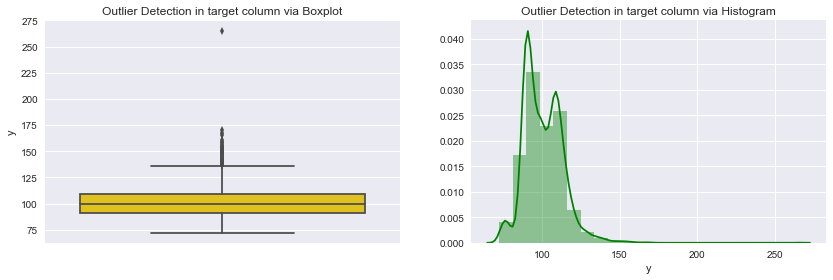

In [7]:

sns.set(rc={'figure.figsize':(14,9)})
plt.subplot(221)
plt.title("Outlier Detection in target column via Boxplot")
plt.ylabel("Values of y")
plt.grid(True)
sns.boxplot(y=df["y"],color='gold')
plt.subplot(222)
plt.title("Outlier Detection in target column via Histogram")
plt.grid(True)
ax = sns.distplot(df.y,color='green',bins=22)
plt.show()

This clearly shows the outliers are above a value of approx. 137.5. Well we will remove outliers after 150.

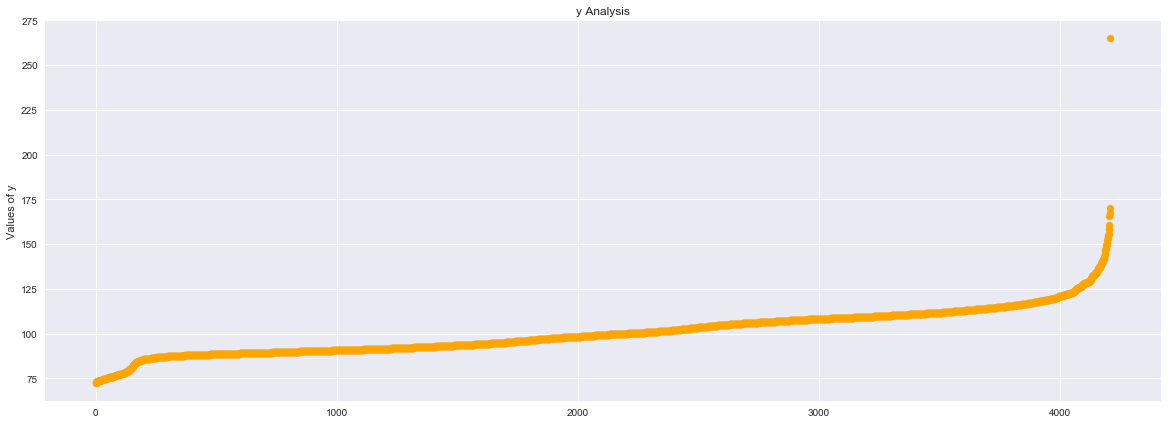

In [8]:
sns.set(rc={'figure.figsize':(20,7)})
plt.title("y Analysis")
plt.ylabel("Values of y")
plt.scatter(range(df.shape[0]),np.sort(df.y.values),color='orange')

A very distinct and conspicuous point around 275 in boxplot and also the green area in histogram. This noise has to removed.

In [9]:
print((df.loc[df.y>150,'y'].values))
df=df[df.y<150]
print("Removing outliers based on above information and setting 150 as a threshold value . . . . . . . . . . . . . . . . . . . . ")
print(df.shape)
df_cat=df_cat[df_cat.y<150]
df_num=df_num[df_num.y<150]

[150.43 169.91 154.87 265.32 158.53 154.43 160.87 150.89 152.32 167.45
 154.16 158.23 153.51 165.52 155.62]
Removing outliers based on above information and setting 150 as a threshold value . . . . . . . . . . . . . . . . . . . . 
(4194, 378)


Further data cleaning . . .
Removing the features from the main dataframe that are involving zero variance or are having constant value inorder to remove redundancy and increase model performance later.
Also checking the individual correlation of the features and getting some idea about individual feature importance.
There are total 13 variables with zero variance , therefore they must be dropped.
Checking for duplicate features in this large set.
Feature selection multiple times .....
Removing columns with zero ovariance

#### Removing columns with only zero value

In [10]:
temp = []
for i in df_num.columns:
    if df[i].var()==0:
        temp.append(i)
print(len(temp))
print(temp)

13
['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X339', 'X347']


##### Again setting a threshold of 0.01 for variance for each column and removing them too. The removed columns are also being removed from all the temporary dataframes. 

In [11]:
count=0
low_var_col=[]
for i in test.columns:
    if test[i].dtype == 'int64':
        if test[i].var()<0.01:
            low_var_col.append(i)
            count+=1
print(count)

df.drop(low_var_col,axis=1,inplace=True)
df_num.drop(low_var_col,axis=1,inplace=True)
test.drop(low_var_col,axis=1,inplace=True)

146


Turn out to be there are 146 columns for removal purpose.

Updating the df_num dataframe after droping the features from original dataframe df.

In [12]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = df.select_dtypes(include=numerics)

Getting the dictionary of important correlated features with target column y

Some important feature correlations with the target variable.

Taking 0.25 as threshold on grounds of experimental changes . .

In [13]:
dic={}
for i in df_num.columns:
    if i!='y':
        if df[i].corr(df.y)>0.25 or df[i].corr(df.y)<-0.25:
            dic[i]=df[i].corr(df.y)
print("Important Features with there respective correlations are ",'\n','---------------------------------------------------------','\n',dic)

Important Features with there respective correlations are  
 --------------------------------------------------------- 
 {'X28': -0.261548387853112, 'X29': -0.3979846718424932, 'X54': -0.39362263688450944, 'X76': -0.39362263688450944, 'X80': -0.2566304628986176, 'X118': 0.2911340078121633, 'X119': 0.2911340078121633, 'X127': -0.5359508861669307, 'X136': 0.39362263688450944, 'X162': -0.3809601526804208, 'X166': -0.3469061103890677, 'X178': -0.3105490342608788, 'X185': -0.25654857309239765, 'X232': -0.3979846718424932, 'X234': -0.27530886410908445, 'X250': -0.32318814896929704, 'X261': 0.6184684577479749, 'X263': 0.3979846718424932, 'X272': -0.36779944561534245, 'X275': 0.29297093005751373, 'X276': -0.37663134331800774, 'X279': -0.3979846718424932, 'X313': -0.3453785698372581, 'X314': 0.6371978536813558, 'X316': -0.2747484119054767, 'X328': -0.3839243197734775, 'X348': -0.25754835598033654, 'X378': -0.27115936517391354}


##### This states that X29, X54, X76, X127, X136, X162, X166, X178, X232, X250, X261, X263, X272, X276, X279, X313, X314, X328 are important features later we will select using some selection techniques.

##### But , YOU MUST SEE THAT SOME FEATURES ARE HAVING SAME CORRELATIONS THAT COULD INDICATE THE POSSIBLE DUPLICATE FEATURES. Lets check them too . .

In [14]:
print(df.X119.corr(df.X118),'\n', df.X29.corr(df.X54) ,'\n', df.X54.corr(df.X76) ,'\n', df.X263.corr(df.X279))

0.9999999999999999 
 0.9971247031088819 
 1.0 
 -1.0


 This shows that are dataframe is containing some duplicate features which are having correlation of approx. 1. We will remove this redundancy also using some feature selection . . .

#### Duplicate features.

In [15]:
# Dublicate features
d = {}; done = []
cols = df.columns.values
for c in cols: d[c]=[]
for i in range(len(cols)):
    if i not in done:
        for j in range(i+1, len(cols)):
            if all(df[cols[i]] == df[cols[j]]):
                done.append(j)
                d[cols[i]].append(cols[j])
dub_cols = []
for k in d.keys():
    if len(d[k]) > 0: 
        dub_cols += d[k]        
print('Dublicates:','\n', dub_cols)

Dublicates: 
 ['X232', 'X279', 'X35', 'X37', 'X113', 'X134', 'X147', 'X222', 'X76', 'X324', 'X84', 'X244', 'X119', 'X146', 'X226', 'X326', 'X360', 'X247']


##### Checking correlations among a set of duplicate features and preparing pairs who are highly correlated.

##### Again, correlation threshold of 0.9 has been judged and taken after multiple experiments .....



In [16]:
corrs=[]
high_corr=[]
for i in range(0,len(dub_cols)):
    for j in range(i+1,len(dub_cols)):
        if df[dub_cols[i]].corr(df[dub_cols[j]]) >=0.90:
            corrs.append(df[dub_cols[i]].corr(df[dub_cols[j]]))
            high_corr.append((dub_cols[i],dub_cols[j]))
print(corrs)
print("\n")
print(high_corr)

[1.0, 0.9971247031088819, 0.9971247031088819, 0.9999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


[('X232', 'X279'), ('X232', 'X76'), ('X279', 'X76'), ('X35', 'X37'), ('X113', 'X134'), ('X113', 'X147'), ('X113', 'X222'), ('X134', 'X147'), ('X134', 'X222'), ('X147', 'X222'), ('X84', 'X244'), ('X226', 'X326')]


In [17]:
df.drop(['X279','X76','X37','X134','X147','X222','X244','X326'] , axis=1 , inplace=True)
test.drop(['X279','X76','X37','X134','X147','X222','X244','X326'] , axis=1 , inplace=True)
df_num.drop(['X279','X76','X37','X134','X147','X222','X244','X326'] , axis=1 , inplace=True)

Label encoding the categorical features

This dataset has some real problem with the number of categories.

There are different number of categories in train and test datset. Encountered

In [18]:
from sklearn import preprocessing
categorical=[]
for i in df.columns:
    if df[i].dtype=='object':
        le = preprocessing.LabelEncoder()
        le.fit(list(df[i].values) + list(test[i].values))
        print("Categories in the encoded order from 1 to the size of "+i+" are : ")
        print(le.classes_)
        print("--------------------------------------------------------------------------")
        df[i] = le.transform(list(df[i].values))
        test[i] = le.transform(list(test[i].values))
        categorical.append(i)

Categories in the encoded order from 1 to the size of X0 are : 
['a' 'aa' 'ab' 'ac' 'ad' 'ae' 'af' 'ag' 'ai' 'aj' 'ak' 'al' 'am' 'an' 'ao'
 'ap' 'aq' 'as' 'at' 'au' 'av' 'aw' 'ax' 'ay' 'az' 'b' 'ba' 'bb' 'bc' 'c'
 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r' 's' 't' 'u'
 'v' 'w' 'x' 'y' 'z']
--------------------------------------------------------------------------
Categories in the encoded order from 1 to the size of X1 are : 
['a' 'aa' 'ab' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p'
 'q' 'r' 's' 't' 'u' 'v' 'w' 'y' 'z']
--------------------------------------------------------------------------
Categories in the encoded order from 1 to the size of X2 are : 
['a' 'aa' 'ab' 'ac' 'ad' 'ae' 'af' 'ag' 'ah' 'ai' 'aj' 'ak' 'al' 'am' 'an'
 'ao' 'ap' 'aq' 'ar' 'as' 'at' 'au' 'av' 'aw' 'ax' 'ay' 'b' 'c' 'd' 'e'
 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r' 's' 't' 'u' 'w' 'x'
 'y' 'z']
-----------------------------------------------------------------------

Now, finding correlations of each category with other . The increasing or decreasing class encoded value can be found from the categories written in the encoded order above.

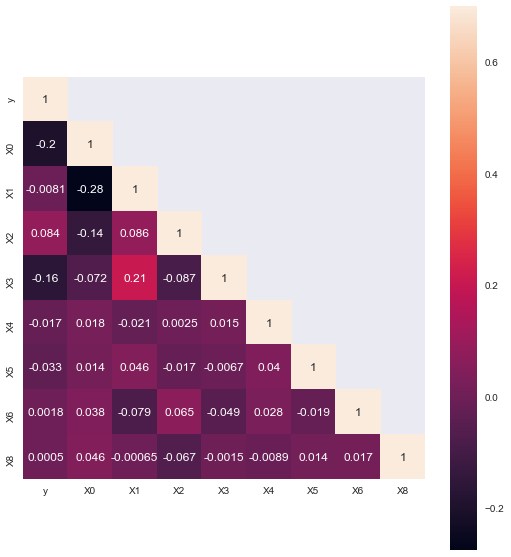

In [19]:
correlation_map = df[df.columns[1:10]].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(9,10)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True)

#### Preparing the data for feature importance

Feature Importance by XGBoost


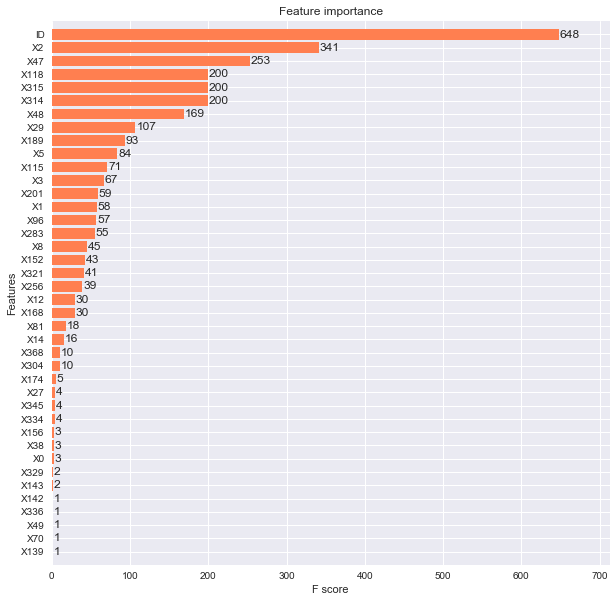

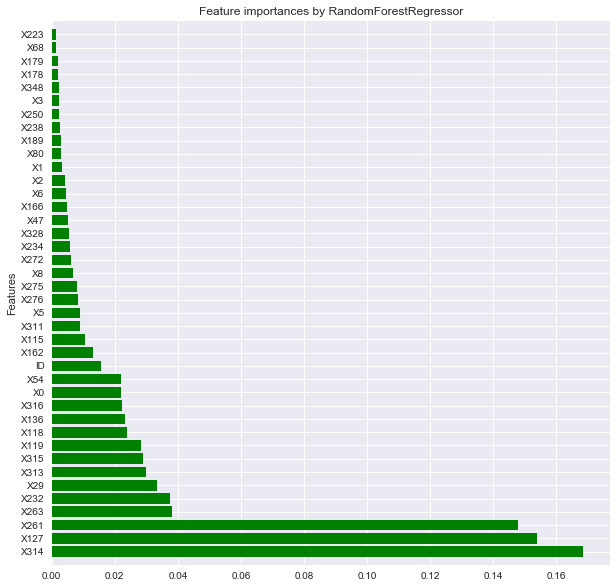

In [20]:
import xgboost as xgb
train_y = df["y"].values
train_X = df.drop(['y'], axis=1)

def xgb_r2_score(preds, final):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

xgb_params = {
    'n_trees': 520, 
    'eta': 0.0045,
    'max_depth': 4,
    'subsample': 0.98,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'base_score': np.mean(train_y), # base prediction = mean(target)
    'silent': 1
}

final = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params), final, num_boost_round=200, feval=xgb_r2_score, maximize=True)

fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(model, max_num_features=40, height=0.8, ax=ax, color = 'coral')
print("Feature Importance by XGBoost")
plt.show()

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_leaf=4, max_features=0.2, n_jobs=-1, random_state=0)
model.fit(train_X, train_y)
feat_names = train_X.columns.values

importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:40]

plt.subplots(figsize=(10,10))
plt.title("Feature importances by RandomForestRegressor")
plt.ylabel("Features")
plt.barh(range(len(indices)), importances[indices], color="green", align="center")
plt.yticks(range(len(indices)), feat_names[indices], rotation='horizontal')
plt.ylim([-1, len(indices)])
plt.show()

##### There seems a difference between the feature importances by the two models. You can check above, RandomForest is giving the feature importance more on the basis of the important correlations of target wrt numerical features that we have already figured out above.

# Lets do some Feature Engineering . . .

### Feature Engineering with interaction variable:

In [21]:
df['X314_plus_X315'] = df.apply(lambda row: row.X314 + row.X315, axis=1)
test['X314_plus_X315'] = test.apply(lambda row: row.X314 + row.X315, axis=1)

In [22]:
print("Correalation between X314_plus_X315 and y is :  ",df.y.corr(df['X314_plus_X315']))
print("Which makes it pretty much high !! Awesome !!")

Correalation between X314_plus_X315 and y is :   0.6990819224017311
Which makes it pretty much high !! Awesome !!


In [23]:
df['X118_plus_X314_plus_X315'] = df.apply(lambda row: row.X118 + row.X314 + row.X315, axis=1)
test['X118_plus_X314_plus_X315'] = test.apply(lambda row: row.X118 + row.X314 + row.X315, axis=1)
print("Correalation between X118_plus_X314_plus_X315 and y is :  ",df.y.corr(df['X118_plus_X314_plus_X315']))
print("Which makes it pretty much high !! Awesome !!")

Correalation between X118_plus_X314_plus_X315 and y is :   0.6837266223799755
Which makes it pretty much high !! Awesome !!


In [24]:
df["X10_plus_X54"] = df.apply(lambda row: row.X10 + row.X54, axis=1)
test["X10_plus_X54"] = test.apply(lambda row: row.X10 + row.X54, axis=1)
print("Correalation between X10_plus_X54 and y is :  ",df.y.corr(df['X10_plus_X54']))

Correalation between X10_plus_X54 and y is :   -0.3597138023478578


In [25]:
df["X10_plus_X29"] = df.apply(lambda row: row.X10 + row.X29, axis=1)
test["X10_plus_X29"] = test.apply(lambda row: row.X10 + row.X29, axis=1)
print("Correalation between X10_plus_X29 and y is :  ",df.y.corr(df['X10_plus_X29']))

Correalation between X10_plus_X29 and y is :   -0.3633528870084599


Updating the dataframe for feature importance , the one we used above.

In [26]:
train_X['X314_plus_X315']=df['X314_plus_X315']
train_X['X118_plus_X314_plus_X315']=df['X118_plus_X314_plus_X315']
train_X["X10_plus_X54"] = df["X10_plus_X54"]
train_X["X10_plus_X29"] = df["X10_plus_X29"]

In [27]:
corr_val=[]
same_features=[]
for i in range(0,len(df_num.columns)-1):
    for j in range(i+1,len(df_num.columns)):
        temp_corr=df[df_num.columns[i]].corr(df[df_num.columns[j]])
        if temp_corr>=0.95 or temp_corr<=-0.95: 
            same_features.append((df_num.columns[i],df_num.columns[j]))
            corr_val.append(temp_corr)
print(len(corr_val))
print(same_features)

63
[('X19', 'X215'), ('X29', 'X54'), ('X29', 'X136'), ('X29', 'X162'), ('X29', 'X232'), ('X29', 'X263'), ('X29', 'X328'), ('X31', 'X35'), ('X48', 'X113'), ('X48', 'X198'), ('X49', 'X129'), ('X52', 'X61'), ('X52', 'X120'), ('X54', 'X136'), ('X54', 'X162'), ('X54', 'X232'), ('X54', 'X263'), ('X54', 'X328'), ('X58', 'X137'), ('X58', 'X324'), ('X61', 'X120'), ('X66', 'X111'), ('X71', 'X84'), ('X80', 'X348'), ('X96', 'X363'), ('X108', 'X371'), ('X113', 'X198'), ('X118', 'X119'), ('X118', 'X311'), ('X119', 'X311'), ('X126', 'X264'), ('X128', 'X130'), ('X136', 'X162'), ('X136', 'X232'), ('X136', 'X263'), ('X136', 'X328'), ('X137', 'X324'), ('X138', 'X140'), ('X138', 'X146'), ('X140', 'X146'), ('X142', 'X158'), ('X152', 'X226'), ('X155', 'X360'), ('X156', 'X157'), ('X162', 'X232'), ('X162', 'X263'), ('X162', 'X328'), ('X178', 'X250'), ('X185', 'X378'), ('X186', 'X194'), ('X186', 'X362'), ('X194', 'X362'), ('X202', 'X247'), ('X208', 'X368'), ('X228', 'X229'), ('X232', 'X263'), ('X232', 'X328'),

In [28]:
booler = np.ones(400)
for i in same_features:
    if booler[int(i[1][1:])]==1:
        booler[int(i[1][1:])]=0
        df_num.drop(i[1],axis=1,inplace=True)
        df.drop(i[1],axis=1,inplace=True)
        test.drop(i[1],axis=1,inplace=True)
        train_X.drop(i[1],axis=1,inplace=True)
    elif booler[int(i[0][1:])]==1:
        booler[int(i[0][1:])]=0
        df_num.drop(i[0],axis=1,inplace=True)
        df.drop(i[0],axis=1,inplace=True)
        test.drop(i[0],axis=1,inplace=True)
        train_X.drop(i[0],axis=1,inplace=True)

#### That look great the new features engineered have outperformed the existing features in the data in the RandomForrest feature importance plot.

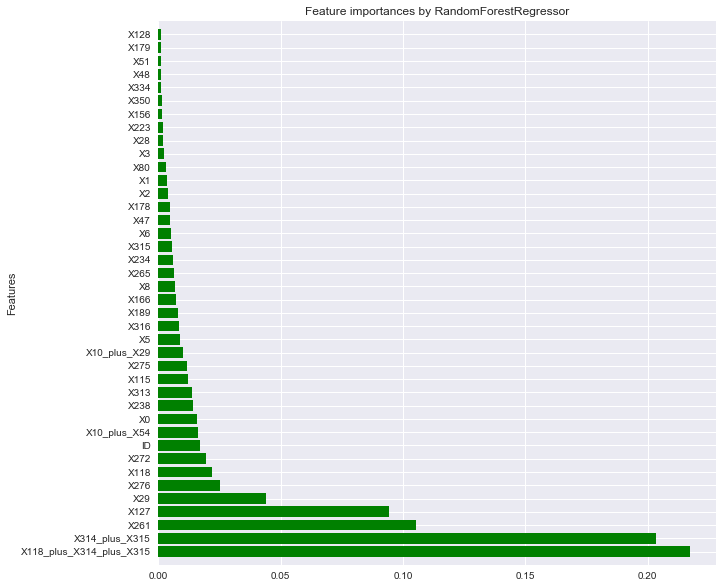

Feature Importance by XGBoost


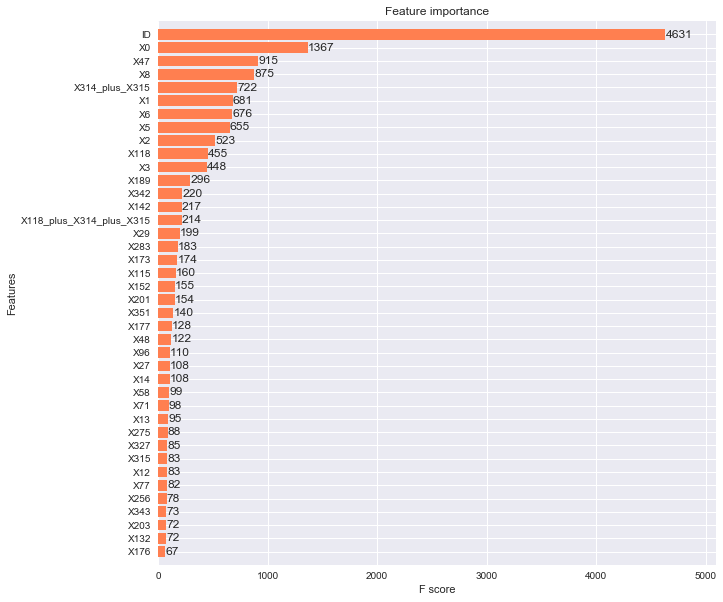

In [29]:
model = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_leaf=4, max_features=0.2, n_jobs=-1, random_state=0)
model.fit(train_X, train_y)
feature_names = train_X.columns.values

importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:40]

plt.subplots(figsize=(10,10))
plt.title("Feature importances by RandomForestRegressor")
plt.ylabel("Features")
plt.barh(range(len(indices)), importances[indices], color="green", align="center")
plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal')
plt.ylim([-1, len(indices)])
plt.show()

final = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params), final, num_boost_round=1350, feval=xgb_r2_score, maximize=True)

fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(model, max_num_features=40, height=0.8, ax=ax,color = 'coral')
print("Feature Importance by XGBoost")
plt.show()

In [30]:
print(train_X.shape , test.shape)

(4194, 185) (4209, 185)


In [31]:
list(set(train_X.columns)-set(test.columns))

[]

In [32]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(train_X, train_y, test_size=0.2, random_state=420)

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)
d_test = xgb.DMatrix(test)

xgb_params = {
    'n_trees': 500, 
    'eta': 0.0050,
    'max_depth': 3,
    'subsample': 0.95,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'base_score': np.mean(train_y), # base prediction = mean(target)
    'silent': 1
}

def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

clf = xgb.train(xgb_params, d_train, 1050 , watchlist, early_stopping_rounds=70, feval=xgb_r2_score, maximize=True, verbose_eval=10)

[0]	train-rmse:11.9877	valid-rmse:11.8271	train-r2:0.006224	valid-r2:0.005964
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 70 rounds.
[10]	train-rmse:11.6256	valid-rmse:11.4666	train-r2:0.065361	valid-r2:0.065634
[20]	train-rmse:11.2882	valid-rmse:11.1312	train-r2:0.118827	valid-r2:0.119486
[30]	train-rmse:10.9726	valid-rmse:10.8175	train-r2:0.167398	valid-r2:0.168424
[40]	train-rmse:10.6793	valid-rmse:10.5267	train-r2:0.211321	valid-r2:0.212533
[50]	train-rmse:10.4066	valid-rmse:10.2564	train-r2:0.251087	valid-r2:0.252449
[60]	train-rmse:10.1537	valid-rmse:10.0061	train-r2:0.287042	valid-r2:0.288498
[70]	train-rmse:9.91887	valid-rmse:9.77395	train-r2:0.319639	valid-r2:0.321127
[80]	train-rmse:9.70151	valid-rmse:9.5593	train-r2:0.349132	valid-r2:0.350618
[90]	train-rmse:9.49997	valid-rmse:9.36101	train-r2:0.375893	valid-r2:0.377279
[100]	train-rmse:9.31385	valid-rmse:9.17796	train-r2:0.400107	valid-r2:

[1020]	train-rmse:7.03181	valid-rmse:7.18771	train-r2:0.658061	valid-r2:0.632862
[1030]	train-rmse:7.02753	valid-rmse:7.1873	train-r2:0.658477	valid-r2:0.632904
[1040]	train-rmse:7.02465	valid-rmse:7.18704	train-r2:0.658757	valid-r2:0.632931
[1049]	train-rmse:7.02095	valid-rmse:7.18748	train-r2:0.659116	valid-r2:0.632885


In [33]:
d_train = xgb.DMatrix(train_X, label=train_y)
#d_valid = xgb.DMatrix(x_valid, label=y_valid)
d_test = xgb.DMatrix(test)

xgb_params = {
    'n_trees': 500, 
    'eta': 0.0050,
    'max_depth': 3,
    'subsample': 0.95,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'base_score': np.mean(train_y), 
    'silent': 1
}

def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

watchlist = [(d_train, 'train')]

clf = xgb.train(xgb_params, d_train, 1050 , watchlist, early_stopping_rounds=70, feval=xgb_r2_score, maximize=True, verbose_eval=10)

[0]	train-rmse:11.956	train-r2:0.006222
Multiple eval metrics have been passed: 'train-r2' will be used for early stopping.

Will train until train-r2 hasn't improved in 70 rounds.
[10]	train-rmse:11.5944	train-r2:0.065424
[20]	train-rmse:11.257	train-r2:0.119021
[30]	train-rmse:10.9424	train-r2:0.167571
[40]	train-rmse:10.65	train-r2:0.211471
[50]	train-rmse:10.3786	train-r2:0.25114
[60]	train-rmse:10.1265	train-r2:0.28708
[70]	train-rmse:9.89281	train-r2:0.319606
[80]	train-rmse:9.67586	train-r2:0.349121
[90]	train-rmse:9.47515	train-r2:0.375844
[100]	train-rmse:9.28969	train-r2:0.400039
[110]	train-rmse:9.1184	train-r2:0.42196
[120]	train-rmse:8.96017	train-r2:0.441846
[130]	train-rmse:8.81481	train-r2:0.459809
[140]	train-rmse:8.68083	train-r2:0.476107
[150]	train-rmse:8.5575	train-r2:0.490886
[160]	train-rmse:8.44421	train-r2:0.504278
[170]	train-rmse:8.34055	train-r2:0.516374
[180]	train-rmse:8.24499	train-r2:0.527392
[190]	train-rmse:8.15727	train-r2:0.537395
[200]	train-rmse:8.

In [34]:
Answer = clf.predict(d_test)

submission = pd.read_csv('sample_submission.csv')
submission['y'] = Answer
submission.to_csv('sample_submission24.csv', index=False)
submission.head(5)

,ID,y
0,1,85.353653
1,2,108.338951
2,3,80.733643
3,4,79.036476
4,5,114.450714


# RESULT:

# In 2rd approach we got (Private Score:0.55282) AND (Public Score:0.55709) On kaggle

# --------------------------------------THIRD APPROACH----------------------------------------------

# THIRD APPROACH COMBINING FEATURE ENGINEERING OF 1st AND SECOND INCREASE SCORE R^2(Coef. of determination)

In [35]:
print(train_X.shape , test.shape)

(4194, 185) (4209, 185)


In [36]:
Y_train=train_y

In [37]:
X_train=train_X
X_test=test

In [ ]:
X_train=train_X
X_test=test

In [38]:
col = [k for k in X_train.columns if k not in {"y","X0","X1","X2","X3","X4","X5","X6","X8"}]

In [40]:
    n_comp=3
    tsvd = TruncatedSVD(n_components=n_comp, random_state=420)
    tsvd_results_train = tsvd.fit_transform(X_train[col])
    tsvd_results_test = tsvd.transform(X_test[col])
    # PCA
    pca = PCA(n_components=n_comp, random_state=420)
    pca2_results_train = pca.fit_transform(X_train[col])
    pca2_results_test = pca.transform(X_test[col])
    # ICA
    ica = FastICA(n_components=n_comp, random_state=420)
    ica2_results_train = ica.fit_transform(X_train[col])
    ica2_results_test = ica.transform(X_test[col])
    # GRP
    grp = GaussianRandomProjection(n_components=n_comp, eps=0.1, random_state=420)
    grp_results_train = grp.fit_transform(X_train[col])
    grp_results_test = grp.transform(X_test[col])
    # SRP
    srp = SparseRandomProjection(n_components=n_comp, dense_output=True, random_state=420)
    srp_results_train = srp.fit_transform(X_train[col])
    srp_results_test = srp.transform(X_test[col])
    for i in range(1, n_comp + 1):
        X_train['tsvd_' + str(i)] = tsvd_results_train[:, i - 1]
        X_test['tsvd_' + str(i)] = tsvd_results_test[:, i - 1]
        X_train['pca_' + str(i)] = pca2_results_train[:, i - 1]
        X_test['pca_' + str(i)] = pca2_results_test[:, i - 1]
        X_train['ica_' + str(i)] = ica2_results_train[:, i - 1]
        X_test['ica_' + str(i)] = ica2_results_test[:, i - 1]
        X_train['grp_' + str(i)] = grp_results_train[:, i - 1]
        X_test['grp_' + str(i)] = grp_results_test[:, i - 1]
        X_train['srp_' + str(i)] = srp_results_train[:, i - 1]
        X_test['srp_' + str(i)] = srp_results_test[:, i - 1]


In [41]:
print(train_X.shape , test.shape)

(4194, 200) (4209, 200)


Feature Importance by XGBoost


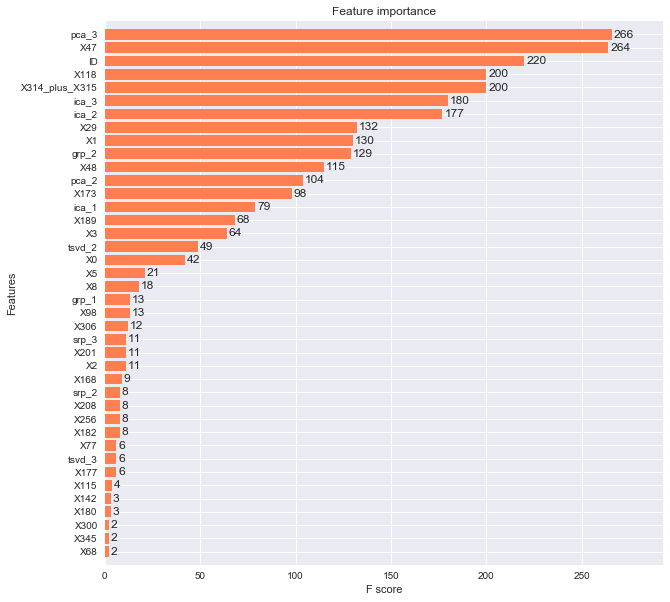

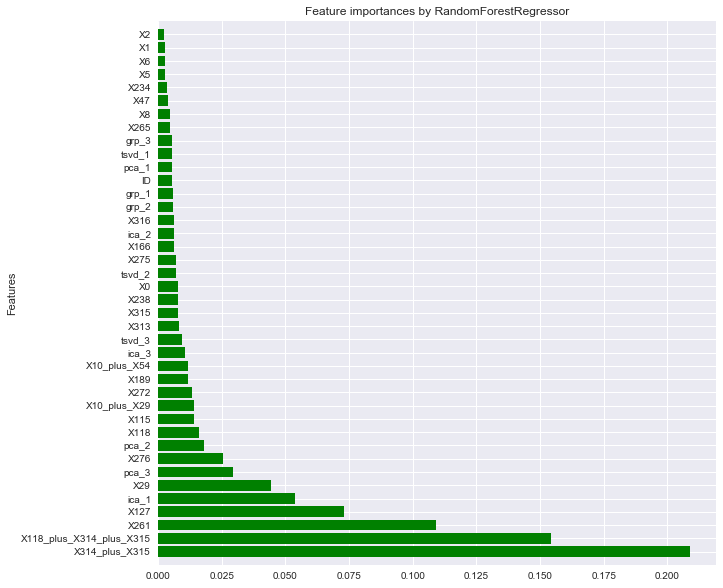

In [42]:
import xgboost as xgb
train_y = Y_train
train_X = X_train

def xgb_r2_score(preds, final):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

xgb_params = {
    'n_trees': 520, 
    'eta': 0.0045,
    'max_depth': 4,
    'subsample': 0.98,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'base_score': np.mean(train_y), # base prediction = mean(target)
    'silent': 1
}

final = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params), final, num_boost_round=200, feval=xgb_r2_score, maximize=True)

fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(model, max_num_features=40, height=0.8, ax=ax, color = 'coral')
print("Feature Importance by XGBoost")
plt.show()

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_leaf=4, max_features=0.2, n_jobs=-1, random_state=0)
model.fit(train_X, train_y)
feat_names = train_X.columns.values

importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:40]

plt.subplots(figsize=(10,10))
plt.title("Feature importances by RandomForestRegressor")
plt.ylabel("Features")
plt.barh(range(len(indices)), importances[indices], color="green", align="center")
plt.yticks(range(len(indices)), feat_names[indices], rotation='horizontal')
plt.ylim([-1, len(indices)])
plt.show()

In [43]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(train_X, train_y, test_size=0.2, random_state=420)

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)
d_test = xgb.DMatrix(test)

xgb_params = {
    'n_trees': 500, 
    'eta': 0.0050,
    'max_depth': 3,
    'subsample': 0.95,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'base_score': np.mean(train_y), # base prediction = mean(target)
    'silent': 1
}

def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

clf = xgb.train(xgb_params, d_train, 1050 , watchlist, early_stopping_rounds=70, feval=xgb_r2_score, maximize=True, verbose_eval=10)

[0]	train-rmse:11.9877	valid-rmse:11.8273	train-r2:0.006234	valid-r2:0.005918
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 70 rounds.
[10]	train-rmse:11.6245	valid-rmse:11.4687	train-r2:0.065538	valid-r2:0.065295
[20]	train-rmse:11.2861	valid-rmse:11.1354	train-r2:0.11915	valid-r2:0.118826
[30]	train-rmse:10.9706	valid-rmse:10.825	train-r2:0.167707	valid-r2:0.167268
[40]	train-rmse:10.6767	valid-rmse:10.536	train-r2:0.21171	valid-r2:0.211147
[50]	train-rmse:10.4032	valid-rmse:10.2678	train-r2:0.251576	valid-r2:0.250795
[60]	train-rmse:10.1502	valid-rmse:10.0204	train-r2:0.287529	valid-r2:0.286456
[70]	train-rmse:9.91438	valid-rmse:9.79002	train-r2:0.320256	valid-r2:0.318892
[80]	train-rmse:9.69616	valid-rmse:9.57714	train-r2:0.349849	valid-r2:0.348191
[90]	train-rmse:9.49442	valid-rmse:9.38054	train-r2:0.376622	valid-r2:0.374678
[100]	train-rmse:9.30716	valid-rmse:9.19944	train-r2:0.40097	valid-r2:0.39

[1020]	train-rmse:6.99075	valid-rmse:7.21291	train-r2:0.662042	valid-r2:0.630283
[1030]	train-rmse:6.98828	valid-rmse:7.21256	train-r2:0.662282	valid-r2:0.630319
[1040]	train-rmse:6.98473	valid-rmse:7.21134	train-r2:0.662624	valid-r2:0.630444
[1049]	train-rmse:6.98154	valid-rmse:7.21051	train-r2:0.662933	valid-r2:0.630529


In [44]:
d_train = xgb.DMatrix(train_X, label=train_y)
#d_valid = xgb.DMatrix(x_valid, label=y_valid)
d_test = xgb.DMatrix(test)

xgb_params = {
    'n_trees': 500, 
    'eta': 0.0050,
    'max_depth': 3,
    'subsample': 0.95,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'base_score': np.mean(train_y), 
    'silent': 1
}

def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

watchlist = [(d_train, 'train')]

clf = xgb.train(xgb_params, d_train, 1050 , watchlist, early_stopping_rounds=70, feval=xgb_r2_score, maximize=True, verbose_eval=10)

[0]	train-rmse:11.9559	train-r2:0.006223
Multiple eval metrics have been passed: 'train-r2' will be used for early stopping.

Will train until train-r2 hasn't improved in 70 rounds.
[10]	train-rmse:11.5935	train-r2:0.065558
[20]	train-rmse:11.2557	train-r2:0.119222
[30]	train-rmse:10.9412	train-r2:0.167749
[40]	train-rmse:10.6486	train-r2:0.21168
[50]	train-rmse:10.3763	train-r2:0.251482
[60]	train-rmse:10.1239	train-r2:0.287453
[70]	train-rmse:9.88934	train-r2:0.320084
[80]	train-rmse:9.67241	train-r2:0.349585
[90]	train-rmse:9.47171	train-r2:0.376297
[100]	train-rmse:9.28612	train-r2:0.4005
[110]	train-rmse:9.11442	train-r2:0.422464
[120]	train-rmse:8.95618	train-r2:0.442344
[130]	train-rmse:8.81032	train-r2:0.460359
[140]	train-rmse:8.67588	train-r2:0.476703
[150]	train-rmse:8.55194	train-r2:0.491548
[160]	train-rmse:8.43813	train-r2:0.504991
[170]	train-rmse:8.33341	train-r2:0.517201
[180]	train-rmse:8.23792	train-r2:0.528202
[190]	train-rmse:8.15014	train-r2:0.538203
[200]	train-r

In [45]:
Answer = clf.predict(d_test)
submission = pd.read_csv('sample_submission.csv')
submission['y'] = Answer
submission.to_csv('sample_submission26.csv', index=False)
submission.head(5)

,ID,y
0,1,84.695724
1,2,104.191376
2,3,81.343300
3,4,80.838570
4,5,116.667526


# In 3rd approach we got (Private Score:0.55077) AND (Public Score:0.55744) On kaggle

# STEPS FOLLOWED:


### 1----->> Exploratory Data Analysis:

          A: Data Loading and Cleaning.

          B: Explore the categorical  and binary variable columns present in the dataset.
          

### 2----->> Data Preperation:

          A: Find the outlier values and drop them.

          B: Drop the columns having ony single value.
          
          C: Convert each catagorical value into labels.
          
          D: Random train test split (80:20) ratio.
          
          E: We did SVD,PCA,GRP,SRP,ICA and take 3 components from each as a feature.
          
          F: We also did interactive variable feature engineering.
 

### 2----->> Machine Learning Models.


            A: Lasso Regression with hyperparameter tuning:

            B: Decision Tree Regression with hyperparameter tuning

            C: XGB Regression with hyperparameter tuning:
            


## OBSERVATIONS:

            A: As we apply above 3 regression models we come to know that if we use model in productionization Lasso Regression
               IS best among above as of time complexity and R^2 MATRIX.
              
            B: If we only care about R^2 matrix then XGB is best.
            
            C: If we take model which have balance between XGB nad LASSO REGRESSION then we can go for decision tree.
            
            D: We observe that with simple feature engineering like with interaction variable we are getting best score. 
            
            
            
####  NOTE:  1  WE CAN IMPROVE OUR MODEL BY DO SOME MORE FEATURE ENGINEERING AND ALSO WITH OTHER REGRESSION  ####                 MODELS AND OTHER ADVANCE TECHNIQUE.

####                2  HERE OUR GOAL IS TO TAKE SOME HANDS ON REAL MACHINE LEARNING  INDUSTRY PROBLEMS AND  NOT TO ####                    MAKE BEST MODEL .

####                3 We tried different approaches like feature engineering to improve our performance metric. 
.

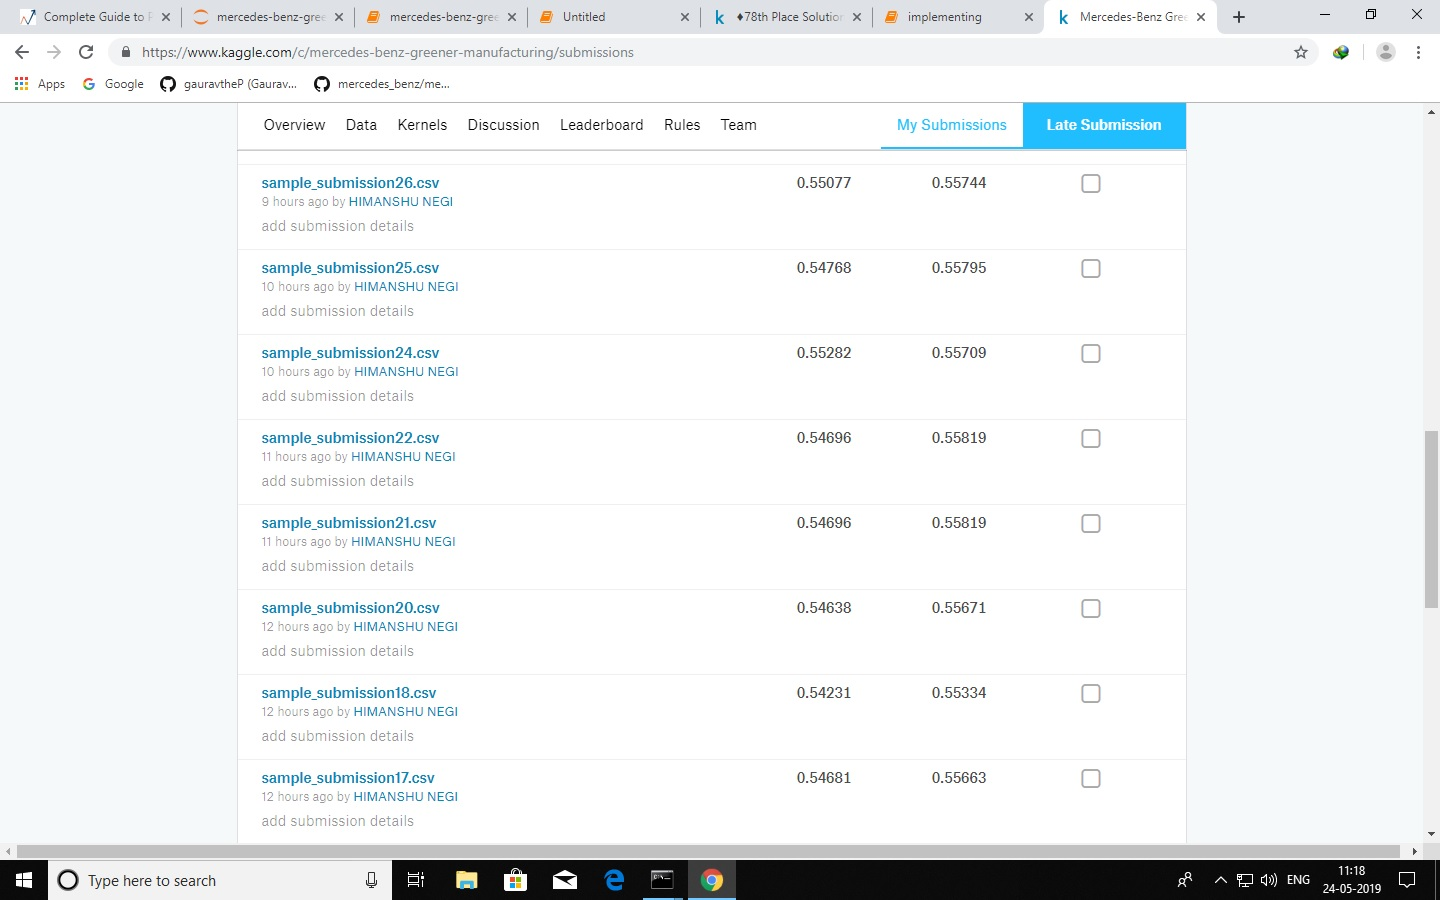

# Link to see score:

https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/submissions?sortBy=date&group=all&page=1&pageSize=20&turbolinks%5BrestorationIdentifier%5D=92824c66-5757-4047-ba2b-d2e3200e4b69

# KAGGLE SCORE RESULT:

In [53]:
# Creating table using PrettyTable library
from prettytable import PrettyTable
    
ptable = PrettyTable()
# Names of models
names =['1st_approach','2nd_approach','3rd_approach']

#alpha=[0.001, 0.001]

Private_Score = [0.54570,0.55282,0.55077]

Public_Score = [0.55275,0.55709,0.55744]

Feature_engineering =['SVD,PCA,GRP,SRP,ICA','Interaction_variable','Combine_of_1st_2nd_approach']

# Adding columns

ptable.add_column("APPROACH_NO",names)

#ptable.add_column("Hyperparameter",alpha)
ptable.add_column("Private_Score",Private_Score)
ptable.add_column("Public_Score ",Public_Score)
ptable.add_column("Feature_engineering ",Feature_engineering)

print(ptable)

+--------------+---------------+---------------+-----------------------------+
| APPROACH_NO  | Private_Score | Public_Score  |     Feature_engineering     |
+--------------+---------------+---------------+-----------------------------+
| 1st_approach |     0.5457    |    0.55275    |     SVD,PCA,GRP,SRP,ICA     |
| 2nd_approach |    0.55282    |    0.55709    |     Interaction_variable    |
| 3rd_approach |    0.55077    |    0.55744    | Combine_of_1st_2nd_approach |
+--------------+---------------+---------------+-----------------------------+
